# Smart Meter - PySpark

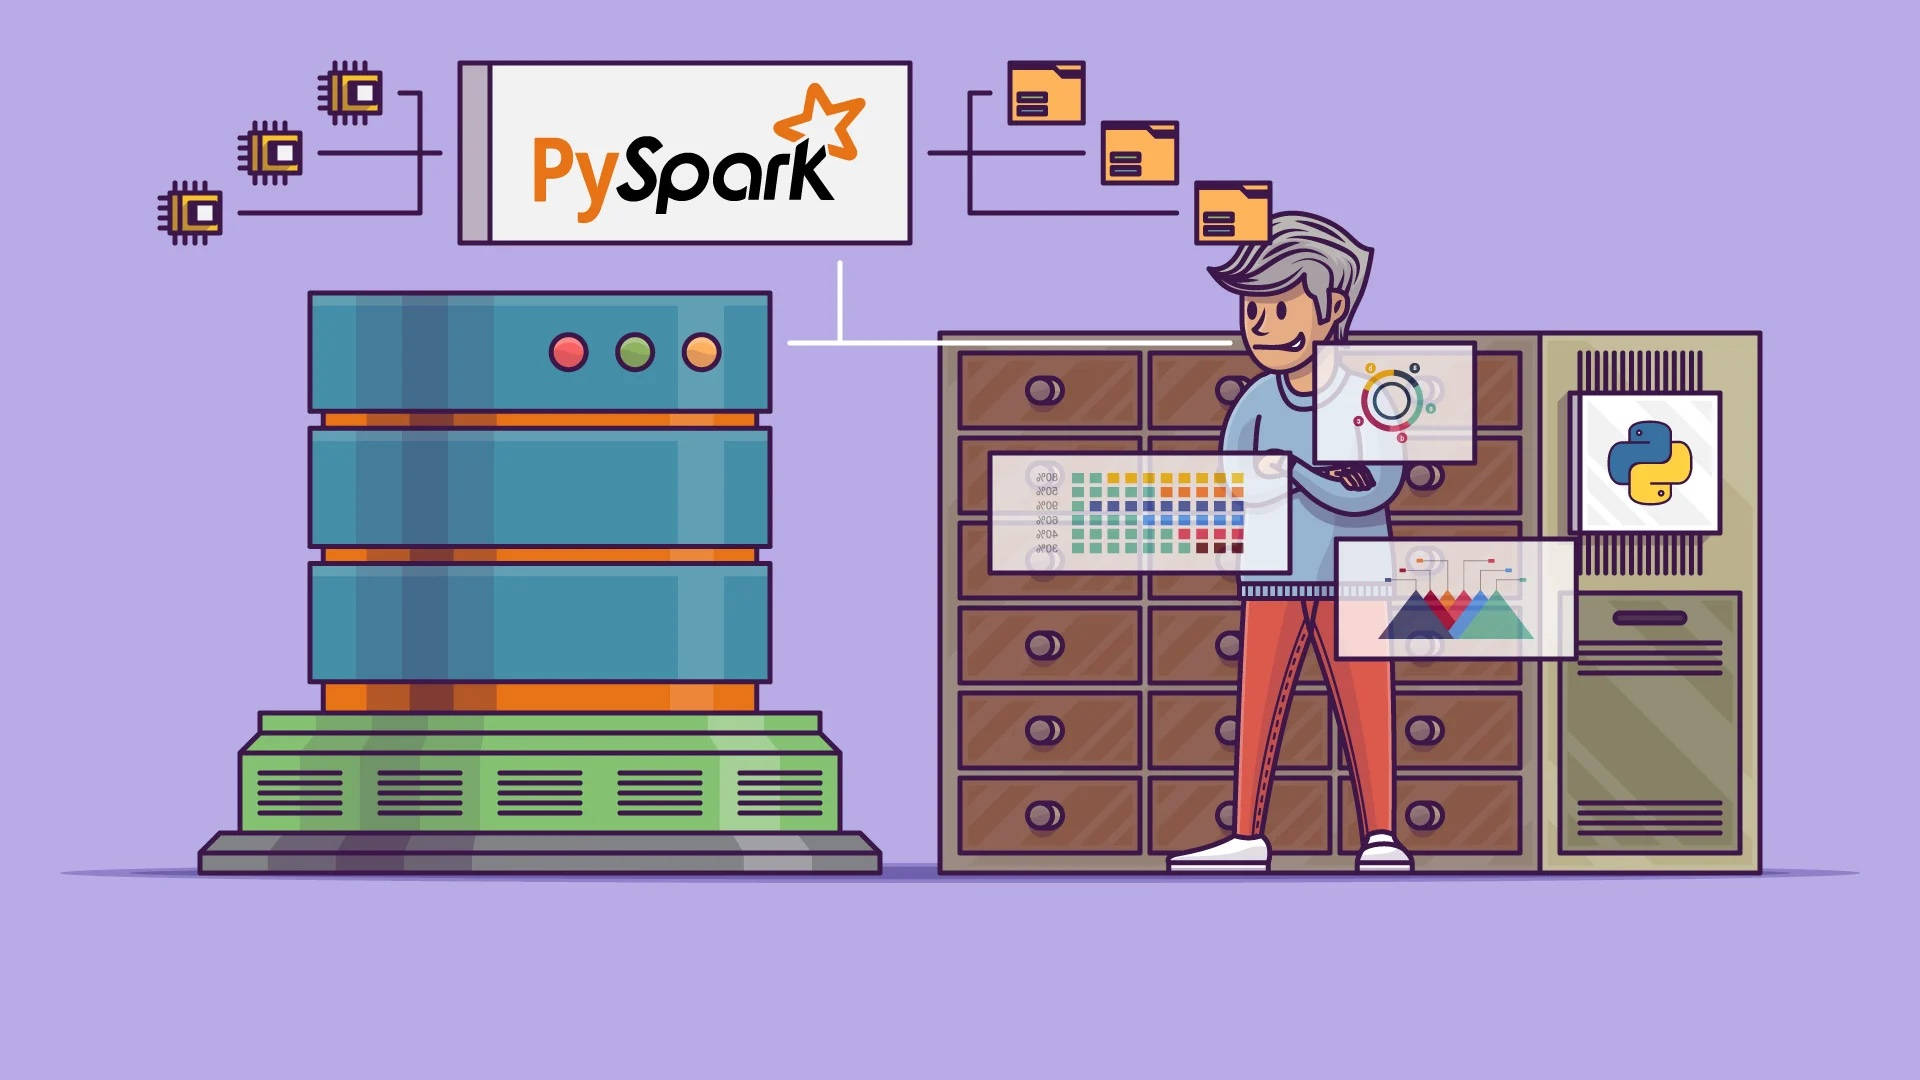

### Importando Bibliotecas e Configurando Spark

In [1]:
#Importando Bibliotecas Genericas
import time
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
pd.set_option('display.max_columns', None)
import os

#Config visualizacoes

#Apontando local do arquivo Spark e da JVM
os.environ['SPARK_HOME'] = '/home/rafaelfabrichimidt/spark-3.3.2-bin-hadoop2'
os.environ['JAVA_HOME'] = '/usr/lib/jvm/java-17-openjdk-amd64'

#Importando biblioteca findspark 
import findspark

#findspark para encontrar o arquivo spark
findspark.init()

In [2]:
from pyspark.sql import functions as f
from pyspark.sql.types import DoubleType, StringType

In [3]:
#Importando SparkSession da biblioteca pyspark.sql
from pyspark.sql import SparkSession

#Importanto tipos de variaveis e functions
from pyspark.sql.types import DoubleType, StringType
from pyspark.sql import functions as f

#Iniciando Spark
spark = SparkSession.builder \
    .master('local[*]') \
    .appName('Iniciando Secao') \
    .getOrCreate()
    

23/05/14 15:36:38 WARN Utils: Your hostname, pop-os resolves to a loopback address: 127.0.1.1; using 192.168.0.104 instead (on interface wlp3s0)
23/05/14 15:36:38 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/05/14 15:36:40 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/05/14 15:36:41 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
23/05/14 15:36:41 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.


In [4]:
spark

### Pandas vs Spark

In [5]:
#LENDO DADOS EM PANDAS

start_pandas = time.time()

path_meter = '/home/rafaelfabrichimidt/Documentos/Projetos/Python/codigos/smart_meter/dataset/archive/halfhourly_dataset/halfhourly_dataset'

file_name = os.listdir(path_meter)

i = 0

for file in file_name:
    
    if i == 0:
    
        df = pd.read_csv(path_meter + '/' + file)
        i = i + 1
    else: 
        df_aux = pd.read_csv(path_meter + '/' + file)
        
        df = pd.concat([df, df_aux])
    
    i = i + 1   

end_pandas = time.time()

In [7]:
#LENDO DADOS EM SPARK
start_spark = time.time()

path_meter = '/home/rafaelfabrichimidt/Documentos/Projetos/Python/codigos/smart_meter/dataset/archive/halfhourly_dataset/halfhourly_dataset'

df_spark = spark.read.csv(path_meter, header = True)

end_spark = time.time()

In [6]:
print(start_pandas) #1683682634.5441537
print(end_pandas) #1683683146.3909738

1683682634.5441537
1683683146.3909738


In [10]:
print('Tempo para leitura dos dados em csv por:')

print('\n - Pandas = {:,.2f} minutos'.format((end_pandas - start_pandas) / 60))

print('\n - Spark  = {:,.2f} minutos'.format((end_spark - start_spark) / 60))

Tempo para leitura dos dados em csv por:

 - Pandas = 8.53 minutos

 - Spark  = 0.16 minutos


In [20]:
print('Qtd de medicoes = {:,.0f}'.format(df.shape[0]).replace(',', '.'))
print('Qtd de medicoes = {:,.0f}'.format(df_spark.count()).replace(',', '.'))

Qtd de medicoes = 167.817.021


Qtd de medicoes = 167.817.021


In [23]:
start_pandas_null = time.time()

print(df.isnull().sum())

end_pandas_null = time.time()

print('\n Tempo ')

print('Pandas = {:,.2f} minutos'.format((end_pandas_null - start_pandas_null) / 60))

LCLid             0
tstp              0
energy(kWh/hh)    0
dtype: int64

 Tempo 
Pandas = 0.81 minutos


In [24]:
start_spark_null = time.time()

print(
     df_spark\
     .select([f.count(f.when(f.isnull(c), 1)).alias(c) for c in df_spark.columns ]).show())

end_spark_null = time.time()

print('\n Tempo ')

print('Spark = {:,.2f} minutos'.format((end_spark_null - start_spark_null) / 60))

+-----+----+--------------+
|LCLid|tstp|energy(kWh/hh)|
+-----+----+--------------+
|    0|   0|             0|
+-----+----+--------------+

None

 Tempo 
Spark = 1.18 minutos


In [25]:
start_pandas_null = time.time()

print(pd.to_datetime(df['tstp']))

end_pandas_null = time.time()

print('\n Tempo ')

print('Pandas = {:,.2f} minutos'.format((end_pandas_null - start_pandas_null) / 60))

0         2012-03-06 12:00:00
1         2012-03-06 12:30:00
2         2012-03-06 13:00:00
3         2012-03-06 13:30:00
4         2012-03-06 14:00:00
                  ...        
1501775   2014-02-27 22:00:00
1501776   2014-02-27 22:30:00
1501777   2014-02-27 23:00:00
1501778   2014-02-27 23:30:00
1501779   2014-02-28 00:00:00
Name: tstp, Length: 167817021, dtype: datetime64[ns]

 Tempo 
Pandas = 0.50 minutos


In [26]:
start_spark_null = time.time()

print(
    df_spark\
        .withColumn('tstp', f.to_timestamp(df_spark['tstp'], 'yyyy-MM-dd HH:mm:ss.SSSSSSS')).limit(20).toPandas() )

end_spark_null = time.time()

print('\n Tempo ')

print('Spark = {:,.2f} minutos'.format((end_spark_null - start_spark_null) / 60))

        LCLid                tstp energy(kWh/hh)
0   MAC000048 2011-12-08 12:30:00         0.229 
1   MAC000048 2011-12-08 13:00:00         0.213 
2   MAC000048 2011-12-08 13:30:00         0.272 
3   MAC000048 2011-12-08 14:00:00         0.576 
4   MAC000048 2011-12-08 14:30:00         0.194 
5   MAC000048 2011-12-08 15:00:00         0.107 
6   MAC000048 2011-12-08 15:30:00         0.107 
7   MAC000048 2011-12-08 16:00:00         0.119 
8   MAC000048 2011-12-08 16:30:00         0.326 
9   MAC000048 2011-12-08 17:00:00         0.299 
10  MAC000048 2011-12-08 17:30:00         0.107 
11  MAC000048 2011-12-08 18:00:00         0.088 
12  MAC000048 2011-12-08 18:30:00         0.088 
13  MAC000048 2011-12-08 19:00:00         0.087 
14  MAC000048 2011-12-08 19:30:00         0.087 
15  MAC000048 2011-12-08 20:00:00         0.088 
16  MAC000048 2011-12-08 20:30:00         0.087 
17  MAC000048 2011-12-08 21:00:00         0.088 
18  MAC000048 2011-12-08 21:30:00           0.1 
19  MAC000048 2011-1

In [28]:
path_save = '/home/rafaelfabrichimidt/Documentos/Projetos/Python/codigos/smart_meter/dataset/achive_parquet/'
df_spark.write.parquet(path_save + 'halfhourly_dataset',  mode = 'overwrite')

23/05/09 23:17:50 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers
23/05/09 23:17:59 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers
23/05/09 23:17:59 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers


23/05/09 23:17:59 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers
23/05/09 23:17:59 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers


23/05/09 23:18:00 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers
23/05/09 23:18:04 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers
23/05/09 23:18:04 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers


23/05/09 23:18:04 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers


23/05/09 23:18:05 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers


23/05/09 23:18:05 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers


23/05/09 23:18:05 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers
23/05/09 23:18:07 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers


23/05/09 23:18:10 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers


23/05/09 23:18:11 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers


23/05/09 23:18:12 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers


23/05/09 23:18:16 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers
23/05/09 23:18:16 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers
23/05/09 23:18:17 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers


23/05/09 23:18:18 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers


23/05/09 23:18:19 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers


23/05/09 23:18:21 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers


23/05/09 23:18:22 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers


23/05/09 23:18:22 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers
23/05/09 23:18:23 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers


23/05/09 23:18:23 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers


23/05/09 23:18:29 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers


23/05/09 23:18:30 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers


23/05/09 23:18:33 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers


23/05/09 23:18:36 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers


23/05/09 23:18:37 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers
23/05/09 23:18:38 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers


23/05/09 23:18:39 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers
23/05/09 23:18:39 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers


23/05/09 23:18:47 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers
23/05/09 23:18:50 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers


23/05/09 23:18:51 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers


23/05/09 23:18:53 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers


23/05/09 23:18:54 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers


23/05/09 23:18:54 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers


23/05/09 23:18:55 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers


23/05/09 23:18:56 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers
23/05/09 23:19:03 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers


23/05/09 23:19:05 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers
23/05/09 23:19:07 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers


23/05/09 23:19:10 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers


23/05/09 23:19:12 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers
23/05/09 23:19:13 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers


23/05/09 23:19:14 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers


23/05/09 23:19:14 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers


23/05/09 23:19:19 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers
23/05/09 23:19:24 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers


23/05/09 23:19:25 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers
23/05/09 23:19:26 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers


23/05/09 23:19:28 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers


23/05/09 23:19:32 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers
23/05/09 23:19:32 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers


23/05/09 23:19:34 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers


23/05/09 23:19:35 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers


23/05/09 23:19:40 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers
23/05/09 23:19:41 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers


23/05/09 23:19:41 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers


23/05/09 23:19:45 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers
23/05/09 23:19:47 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers


23/05/09 23:19:49 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers


23/05/09 23:19:50 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers


23/05/09 23:19:53 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers


23/05/09 23:19:58 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers
23/05/09 23:19:59 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers


23/05/09 23:19:59 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers
23/05/09 23:20:02 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers


23/05/09 23:20:03 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers


23/05/09 23:20:03 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers


23/05/09 23:20:05 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers
23/05/09 23:20:05 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers


23/05/09 23:20:07 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers
23/05/09 23:20:08 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers


23/05/09 23:20:08 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers


23/05/09 23:20:10 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers
23/05/09 23:20:11 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers


23/05/09 23:20:12 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers


23/05/09 23:20:12 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers


23/05/09 23:20:14 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers
23/05/09 23:20:15 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers


23/05/09 23:20:16 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers


23/05/09 23:20:16 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers
23/05/09 23:20:19 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers


23/05/09 23:20:19 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers
23/05/09 23:20:20 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers


23/05/09 23:20:21 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers


23/05/09 23:20:21 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers
23/05/09 23:20:22 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers


23/05/09 23:20:23 WARN MemoryManager: Total allocation exceeds 95,00% (1.020.054.720 bytes) of heap memory
Scaling row group sizes to 95,00% for 8 writers


In [4]:
#LENDO DADOS EM SPARK
start_spark = time.time()

path_save = '/home/rafaelfabrichimidt/Documentos/Projetos/Python/codigos/smart_meter/dataset/achive_parquet/'

df_spark = spark.read.parquet(path_save + 'halfhourly_dataset', header = True)

end_spark = time.time()

In [5]:
print('Tempo para leitura dos dados em csv por:')

print('\n - Spark  = {:,.2f} minutos'.format((end_spark - start_spark) / 60))

Tempo para leitura dos dados em csv por:

 - Spark  = 0.10 minutos


In [25]:
start_spark_null = time.time()

print(
     df_spark\
     .select([f.count(f.when(f.isnull(c), 1)).alias(c) for c in df_spark.columns ]).show())

end_spark_null = time.time()

print('\n Tempo ')

print('Spark = {:,.2f} minutos'.format((end_spark_null - start_spark_null) / 60))

+-----+----+--------------+
|LCLid|tstp|energy(kWh/hh)|
+-----+----+--------------+
|    0|   0|             0|
+-----+----+--------------+

None

 Tempo 
Spark = 0.13 minutos


In [24]:
start_spark = time.time()

print(
    df_spark\
        .withColumn('tstp', f.to_timestamp(df_spark['tstp'], 'yyyy-MM-dd HH:mm:ss.SSSSSSS')).limit(20).toPandas() )

end_spark = time.time()

print('\n Tempo ')

print('Spark = {:,.4f} minutos'.format((end_spark - start_spark) / 60))

        LCLid                tstp energy(kWh/hh)
0   MAC000071 2011-12-10 09:30:00         0.356 
1   MAC000071 2011-12-10 10:00:00         0.245 
2   MAC000071 2011-12-10 10:30:00         0.168 
3   MAC000071 2011-12-10 11:00:00         0.216 
4   MAC000071 2011-12-10 11:30:00          0.16 
5   MAC000071 2011-12-10 12:00:00         0.271 
6   MAC000071 2011-12-10 12:30:00         0.159 
7   MAC000071 2011-12-10 13:00:00           0.2 
8   MAC000071 2011-12-10 13:30:00         0.276 
9   MAC000071 2011-12-10 14:00:00         0.375 
10  MAC000071 2011-12-10 14:30:00         0.202 
11  MAC000071 2011-12-10 15:00:00         0.239 
12  MAC000071 2011-12-10 15:30:00         0.196 
13  MAC000071 2011-12-10 16:00:00         0.233 
14  MAC000071 2011-12-10 16:30:00         0.449 
15  MAC000071 2011-12-10 17:00:00         0.497 
16  MAC000071 2011-12-10 17:30:00         0.529 
17  MAC000071 2011-12-10 18:00:00          1.86 
18  MAC000071 2011-12-10 18:30:00         1.191 
19  MAC000071 2011-1

### JOIN com outras tabelas

In [9]:
df_spark.limit(5).toPandas()

,LCLid,tstp,energy(kWh/hh)
0,MAC000071,2011-12-10 09:30:00.0000000,0.356
1,MAC000071,2011-12-10 10:00:00.0000000,0.245
2,MAC000071,2011-12-10 10:30:00.0000000,0.168
3,MAC000071,2011-12-10 11:00:00.0000000,0.216
4,MAC000071,2011-12-10 11:30:00.0000000,0.16


In [6]:
old_columns = df_spark.columns
new_columns = ['ID_CLIENTE', 'DATA_HORA_MEDICAO', 'POTENCIA_(kWh/hh)']

names = dict(zip(old_columns, new_columns))

for name_old in names.keys():
    df_spark = df_spark.withColumnRenamed(name_old, names[name_old])

In [7]:
df_spark.limit(5).toPandas()

,ID_CLIENTE,DATA_HORA_MEDICAO,POTENCIA_(kWh/hh)
0,MAC000071,2011-12-10 09:30:00.0000000,0.356
1,MAC000071,2011-12-10 10:00:00.0000000,0.245
2,MAC000071,2011-12-10 10:30:00.0000000,0.168
3,MAC000071,2011-12-10 11:00:00.0000000,0.216
4,MAC000071,2011-12-10 11:30:00.0000000,0.16


In [9]:
df_spark.printSchema()

root
 |-- ID_CLIENTE: string (nullable = true)
 |-- DATA_HORA_MEDICAO: string (nullable = true)
 |-- POTENCIA_(kWh/hh): string (nullable = true)



In [8]:
df_spark = df_spark.withColumn('DATA_HORA_MEDICAO', 
                               f.to_timestamp(df_spark['DATA_HORA_MEDICAO'], 'yyyy-MM-dd hh:mm:ss.SSSSSSS'))

In [122]:
df_spark.printSchema()

root
 |-- ID_CLIENTE: string (nullable = true)
 |-- DATA_HORA_MEDICAO: timestamp (nullable = true)
 |-- POTENCIA_(kWh/hh): string (nullable = true)



In [9]:
df_spark = df_spark\
            .withColumn('DATA',
                        f.to_date(df_spark['DATA_HORA_MEDICAO']))\
            .withColumn('ANO',
                        f.year(df_spark['DATA_HORA_MEDICAO']))\
            .withColumn('MES',
                        f.month(df_spark['DATA_HORA_MEDICAO']))\
            .withColumn('DIA',
                        f.dayofmonth(df_spark['DATA_HORA_MEDICAO']))\
            .withColumn('HORARIO', 
                        f.hour(df_spark['DATA_HORA_MEDICAO']))

In [10]:
df_spark = df_spark\
      .withColumn('DATA_HORA',
                  f.concat_ws(' ',
                                    df_spark['DATA'],
                                    df_spark['HORARIO']))

In [11]:
df_spark.limit(5).toPandas()

,ID_CLIENTE,DATA_HORA_MEDICAO,POTENCIA_(kWh/hh),DATA,ANO,MES,DIA,HORARIO,DATA_HORA
0,MAC000071,2011-12-10 09:30:00,0.356,2011-12-10,2011,12,10,9,2011-12-10 9
1,MAC000071,2011-12-10 10:00:00,0.245,2011-12-10,2011,12,10,10,2011-12-10 10
2,MAC000071,2011-12-10 10:30:00,0.168,2011-12-10,2011,12,10,10,2011-12-10 10
3,MAC000071,2011-12-10 11:00:00,0.216,2011-12-10,2011,12,10,11,2011-12-10 11
4,MAC000071,2011-12-10 11:30:00,0.16,2011-12-10,2011,12,10,11,2011-12-10 11


In [12]:
#caminho para os arquivos com dados
path = '/home/rafaelfabrichimidt/Documentos/Projetos/Python/codigos/smart_meter/dataset/archive/data/'

holidays = spark.read.csv(path + 'uk_bank_holidays.csv', header = True, inferSchema = True)

weather_daily_darksky = spark.read.csv(path + 'weather_daily_darksky.csv', header = True, inferSchema = True)

weather_hour_darksky = spark.read.csv(path + 'weather_hourly_darksky.csv', header = True, inferSchema = True)

In [14]:
old_columns = holidays.columns
new_columns = ['DATA', 'FERIADO']

names_columns = dict(zip(old_columns, new_columns))

for old_name in names_columns.keys():
    holidays = holidays.withColumnRenamed(old_name, names_columns[old_name])

In [19]:
holidays.orderBy('DATA').limit(15).toPandas()

,DATA,FERIADO
0,2012-02-01,New Year?s Day (substitute day)
1,2012-04-06,Spring bank holiday (substitute day)
2,2012-05-06,Queen?s Diamond Jubilee (extra bank holiday)
3,2012-06-04,Good Friday
4,2012-07-05,Early May bank holiday
5,2012-08-27,Summer bank holiday
6,2012-09-04,Easter Monday
7,2012-12-25,Christmas Day
8,2012-12-26,Boxing Day
9,2013-01-01,New Year?s Day


In [16]:
holidays.printSchema()

root
 |-- DATA: timestamp (nullable = true)
 |-- FERIADO: string (nullable = true)



In [18]:
holidays = holidays.withColumn('DATA', f.to_date(holidays['DATA']))

In [25]:
#Replicando feriados de 2012 em 2011
holidays_2012 = holidays.where(holidays['DATA'] < f.lit('2013-01-01'))
holidays_2011 = holidays_2012.select(f.add_months(holidays_2012['DATA'], -12).alias('DATA'), holidays_2012['FERIADO'])

In [36]:
holidays_2011.orderBy('DATA').limit(10).toPandas()

,DATA,FERIADO
0,2011-02-01,New Year?s Day (substitute day)
1,2011-04-06,Spring bank holiday (substitute day)
2,2011-05-06,Queen?s Diamond Jubilee (extra bank holiday)
3,2011-06-04,Good Friday
4,2011-07-05,Early May bank holiday
5,2011-08-27,Summer bank holiday
6,2011-09-04,Easter Monday
7,2011-12-25,Christmas Day
8,2011-12-26,Boxing Day


In [35]:
holidays.select('*').where(holidays_2011['FERIADO'].like('%Spring%')).show()

+-------------------+--------------------+
|               DATA|             FERIADO|
+-------------------+--------------------+
|2012-04-06 00:00:00|Spring bank holid...|
|2013-05-27 00:00:00| Spring bank holiday|
|2014-05-26 00:00:00| Spring bank holiday|
+-------------------+--------------------+



In [30]:
holidays_2011\
    .withColumn('DATA',
                f.when(holidays_2011['DATA'] == f.lit('2011-02-01'),
                      f.regexp_replace(holidays_2011['DATA'], '2011-02-01', '2011-01-01'))\
                f.when(())
               ).show()

+----------+--------------------+
|      DATA|             FERIADO|
+----------+--------------------+
|      null|          Boxing Day|
|      null|       Christmas Day|
|      null| Summer bank holiday|
|      null|Queen?s Diamond J...|
|      null|Spring bank holid...|
|      null|Early May bank ho...|
|      null|       Easter Monday|
|      null|         Good Friday|
|2011-01-01|New Year?s Day (s...|
+----------+--------------------+



In [38]:
#Testando funcao when e regexp_replace
new_holidays.withColumn('DATA',
                         f.when(new_holidays['DATA'] == f.lit('2012-02-01'), 
                         f.regexp_replace(new_holidays['DATA'],'2012-02-01', '2012-01-01'))).show()

+----------+--------------------+
|      DATA|             FERIADO|
+----------+--------------------+
|      null|          Boxing Day|
|      null|       Christmas Day|
|      null| Summer bank holiday|
|      null|Queen?s Diamond J...|
|      null|Spring bank holid...|
|      null|Early May bank ho...|
|      null|       Easter Monday|
|      null|         Good Friday|
|      null|New Year?s Day (s...|
|      null|          Boxing Day|
|      null|       Christmas Day|
|      null| Summer bank holiday|
|      null|Queen?s Diamond J...|
|      null|Spring bank holid...|
|      null|Early May bank ho...|
|      null|       Easter Monday|
|      null|         Good Friday|
|2012-01-01|New Year?s Day (s...|
|      null|          Boxing Day|
|      null|       Christmas Day|
+----------+--------------------+
only showing top 20 rows



In [20]:
new_holidays = holidays_2011.union(holidays)

In [37]:
#Testando funcao when e regexp_replace com otherwise
new_holidays\
    .withColumn('DATA',
         f.when(new_holidays['DATA'] == f.lit('2012-02-01'), 
         f.regexp_replace(new_holidays['DATA'],'2012-02-01', '2012-01-01'))\
         .otherwise(new_holidays['DATA'])).show()

+----------+--------------------+
|      DATA|             FERIADO|
+----------+--------------------+
|2011-12-26|          Boxing Day|
|2011-12-25|       Christmas Day|
|2011-08-27| Summer bank holiday|
|2011-05-06|Queen?s Diamond J...|
|2011-04-06|Spring bank holid...|
|2011-07-05|Early May bank ho...|
|2011-09-04|       Easter Monday|
|2011-06-04|         Good Friday|
|2011-02-01|New Year?s Day (s...|
|2012-12-26|          Boxing Day|
|2012-12-25|       Christmas Day|
|2012-08-27| Summer bank holiday|
|2012-05-06|Queen?s Diamond J...|
|2012-04-06|Spring bank holid...|
|2012-07-05|Early May bank ho...|
|2012-09-04|       Easter Monday|
|2012-06-04|         Good Friday|
|2012-01-01|New Year?s Day (s...|
|2013-12-26|          Boxing Day|
|2013-12-25|       Christmas Day|
+----------+--------------------+
only showing top 20 rows



In [45]:
new_holidays\
    .withColumn('DATA',
         f.when(new_holidays['DATA'] == f.lit('2012-02-01'), 
                f.regexp_replace(new_holidays['DATA'],'2012-02-01', '2012-01-01'))\
         .when(new_holidays['DATA'] == f.lit('2011-02-01'),
                f.regexp_replace(new_holidays['DATA'], '2011-02-01', '2011-01-01'))\
         .otherwise(new_holidays['DATA'])).orderBy(new_holidays['DATA']).show()

+----------+--------------------+
|      DATA|             FERIADO|
+----------+--------------------+
|2011-01-01|New Year?s Day (s...|
|2011-04-06|Spring bank holid...|
|2011-05-06|Queen?s Diamond J...|
|2011-06-04|         Good Friday|
|2011-07-05|Early May bank ho...|
|2011-08-27| Summer bank holiday|
|2011-09-04|       Easter Monday|
|2011-12-25|       Christmas Day|
|2011-12-26|          Boxing Day|
|2012-01-01|New Year?s Day (s...|
|2012-04-06|Spring bank holid...|
|2012-05-06|Queen?s Diamond J...|
|2012-06-04|         Good Friday|
|2012-07-05|Early May bank ho...|
|2012-08-27| Summer bank holiday|
|2012-09-04|       Easter Monday|
|2012-12-25|       Christmas Day|
|2012-12-26|          Boxing Day|
|2013-01-01|      New Year?s Day|
|2013-01-04|       Easter Monday|
+----------+--------------------+
only showing top 20 rows



In [21]:
new_holidays.orderBy(new_holidays['DATA']).show()

+----------+--------------------+
|      DATA|             FERIADO|
+----------+--------------------+
|2011-02-01|New Year?s Day (s...|
|2011-04-06|Spring bank holid...|
|2011-05-06|Queen?s Diamond J...|
|2011-06-04|         Good Friday|
|2011-07-05|Early May bank ho...|
|2011-08-27| Summer bank holiday|
|2011-09-04|       Easter Monday|
|2011-12-25|       Christmas Day|
|2011-12-26|          Boxing Day|
|2012-02-01|New Year?s Day (s...|
|2012-04-06|Spring bank holid...|
|2012-05-06|Queen?s Diamond J...|
|2012-06-04|         Good Friday|
|2012-07-05|Early May bank ho...|
|2012-08-27| Summer bank holiday|
|2012-09-04|       Easter Monday|
|2012-12-25|       Christmas Day|
|2012-12-26|          Boxing Day|
|2013-01-01|      New Year?s Day|
|2013-01-04|       Easter Monday|
+----------+--------------------+
only showing top 20 rows



In [72]:
df_spark.printSchema()

root
 |-- ID_CLIENTE: string (nullable = true)
 |-- DATA_HORA_MEDICAO: timestamp (nullable = true)
 |-- POTENCIA_(kWh/hh): string (nullable = true)
 |-- DATA: date (nullable = true)
 |-- ANO: integer (nullable = true)
 |-- MES: integer (nullable = true)
 |-- DIA: integer (nullable = true)
 |-- HORARIO: integer (nullable = true)
 |-- DATA_HORA: string (nullable = false)



In [116]:
df_spark = df_spark.join(new_holidays, on = 'DATA', how = 'left')

In [118]:
df_spark.orderBy('DATA').show()

+----------+----------+--------------------+-----------------+----+---+---+-------+-------------+-------+-------+
|      DATA|ID_CLIENTE|   DATA_HORA_MEDICAO|POTENCIA_(kWh/hh)| ANO|MES|DIA|HORARIO|    DATA_HORA|FERIADO|FERIADO|
+----------+----------+--------------------+-----------------+----+---+---+-------+-------------+-------+-------+
|2011-11-23| MAC000145|2011-11-23 09:00:...|           0.355 |2011| 11| 23|      9| 2011-11-23 9|   null|   null|
|2011-11-23| MAC000145|2011-11-23 19:00:...|           0.928 |2011| 11| 23|     19|2011-11-23 19|   null|   null|
|2011-11-23| MAC000145|2011-11-23 09:30:...|           0.414 |2011| 11| 23|      9| 2011-11-23 9|   null|   null|
|2011-11-23| MAC000145|2011-11-23 10:00:...|           0.335 |2011| 11| 23|     10|2011-11-23 10|   null|   null|
|2011-11-23| MAC000145|2011-11-23 10:30:...|           0.183 |2011| 11| 23|     10|2011-11-23 10|   null|   null|
|2011-11-23| MAC000145|2011-11-23 11:00:...|           0.226 |2011| 11| 23|     11|2011-

In [29]:
df_spark.select((f.count(f.when(f.isnull('FERIADO'), 1)) / df_spark.count()).alias('FERIADO') ).show()

+------------------+
|           FERIADO|
+------------------+
|0.9769605193980889|
+------------------+



In [ ]:
df_spark.where

In [31]:
df_spark\
    .where(df_spark['FERIADO'].isNotNull()).limit(5).toPandas()

,DATA,ID_CLIENTE,DATA_HORA_MEDICAO,POTENCIA_(kWh/hh),ANO,MES,DIA,HORARIO,DATA_HORA,FERIADO
0,2012-02-01,MAC000071,2012-02-01 00:00:00.0000000,0.129,2012,2,1,0,2012-02-01 0,New Year?s Day (substitute day)
1,2012-02-01,MAC000071,2012-02-01 00:30:00.0000000,0.117,2012,2,1,0,2012-02-01 0,New Year?s Day (substitute day)
2,2012-02-01,MAC000071,2012-02-01 01:00:00.0000000,0.129,2012,2,1,1,2012-02-01 1,New Year?s Day (substitute day)
3,2012-02-01,MAC000071,2012-02-01 01:30:00.0000000,0.11,2012,2,1,1,2012-02-01 1,New Year?s Day (substitute day)
4,2012-02-01,MAC000071,2012-02-01 02:00:00.0000000,0.144,2012,2,1,2,2012-02-01 2,New Year?s Day (substitute day)


In [24]:
df_spark.where(df_spark['ANO'] == 2012).limit(30).toPandas()

,DATA,ID_CLIENTE,DATA_HORA_MEDICAO,POTENCIA_(kWh/hh),ANO,MES,DIA,HORARIO,DATA_HORA,FERIADO
0,2012-01-01,MAC000071,2012-01-01 00:00:00.0000000,0.175,2012,1,1,0,2012-01-01 0,None
1,2012-01-01,MAC000071,2012-01-01 00:30:00.0000000,0.13,2012,1,1,0,2012-01-01 0,None
2,2012-01-01,MAC000071,2012-01-01 01:00:00.0000000,0.131,2012,1,1,1,2012-01-01 1,None
3,2012-01-01,MAC000071,2012-01-01 01:30:00.0000000,0.137,2012,1,1,1,2012-01-01 1,None
4,2012-01-01,MAC000071,2012-01-01 02:00:00.0000000,0.198,2012,1,1,2,2012-01-01 2,None
5,2012-01-01,MAC000071,2012-01-01 02:30:00.0000000,0.146,2012,1,1,2,2012-01-01 2,None
6,2012-01-01,MAC000071,2012-01-01 03:00:00.0000000,0.147,2012,1,1,3,2012-01-01 3,None
7,2012-01-01,MAC000071,2012-01-01 03:30:00.0000000,0.145,2012,1,1,3,2012-01-01 3,None
8,2012-01-01,MAC000071,2012-01-01 04:00:00.0000000,0.143,2012,1,1,4,2012-01-01 4,None
9,2012-01-01,MAC000071,2012-01-01 04:30:00.0000000,0.144,2012,1,1,4,2012-01-01 4,None


In [ ]:
df_spark.select([f.count(f.when(f.isnull('')))])

In [96]:
df_spark.select([f.count(f.when(f.isnull(c), 1)).alias(c) for c in aux.columns]).toPandas()

ERROR:root:KeyboardInterrupt while sending command.][Stage 46:>  (0 + 0) / 11]1]
Traceback (most recent call last):
  File "/home/rafaelfabrichimidt/Documentos/Projetos/Python/env/base/lib/python3.10/site-packages/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/home/rafaelfabrichimidt/Documentos/Projetos/Python/env/base/lib/python3.10/site-packages/py4j/clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
  File "/usr/lib/python3.10/socket.py", line 705, in readinto
    return self._sock.recv_into(b)
KeyboardInterrupt


KeyboardInterrupt: 

In [ ]:
aux.select([f.count(f.when(f.isnull(c), 1)).alias(c) for c in aux.columns])

In [40]:
acorn_details.limit(20).toPandas()

,MAIN CATEGORIES,CATEGORIES,REFERENCE,ACORN-A,ACORN-B,ACORN-C,ACORN-D,ACORN-E,ACORN-F,ACORN-G,ACORN-H,ACORN-I,ACORN-J,ACORN-K,ACORN-L,ACORN-M,ACORN-N,ACORN-O,ACORN-P,ACORN-Q
0,POPULATION,Age,Age 0-4,77.0,83.0,72.0,100.0,120.0,77.0,97.0,97.0,63.0,119.0,67.0,114.0,113.0,89.0,123.0,138.0,133.0
1,POPULATION,Age,Age 5-17,117.0,109.0,87.0,69.0,94.0,95.0,102.0,106.0,67.0,95.0,64.0,108.0,116.0,86.0,89.0,136.0,106.0
2,POPULATION,Age,Age 18-24,64.0,73.0,67.0,107.0,100.0,71.0,83.0,89.0,62.0,104.0,459.0,97.0,96.0,86.0,117.0,109.0,110.0
3,POPULATION,Age,Age 25-34,52.0,63.0,62.0,197.0,151.0,66.0,90.0,88.0,63.0,132.0,145.0,109.0,96.0,90.0,140.0,120.0,120.0
4,POPULATION,Age,Age 35-49,102.0,105.0,91.0,124.0,118.0,93.0,102.0,103.0,76.0,111.0,67.0,99.0,98.0,90.0,102.0,103.0,100.0
5,POPULATION,Age,Age 50-64,124.0,121.0,120.0,72.0,82.0,126.0,109.0,107.0,112.0,90.0,41.0,95.0,96.0,103.0,89.0,78.0,89.0
6,POPULATION,Age,Aged 65-74,125.0,120.0,152.0,55.0,61.0,144.0,108.0,104.0,182.0,72.0,29.0,91.0,93.0,125.0,73.0,59.0,76.0
7,POPULATION,Age,Aged 75 plus,112.0,103.0,157.0,49.0,57.0,117.0,98.0,96.0,220.0,66.0,32.0,87.0,96.0,152.0,72.0,56.0,76.0
8,POPULATION,Geography,England,107.0,101.0,103.0,114.0,106.0,75.0,107.0,106.0,102.0,106.0,95.0,93.0,97.0,89.0,97.0,110.0,97.0
9,POPULATION,Geography,Northern Ireland,30.0,95.0,45.0,2.0,49.0,462.0,53.0,104.0,30.0,91.0,56.0,87.0,131.0,67.0,95.0,75.0,43.0


In [41]:
households.limit(5).toPandas()

,LCLid,stdorToU,Acorn,Acorn_grouped,file
0,MAC005492,ToU,ACORN-,ACORN-,block_0
1,MAC001074,ToU,ACORN-,ACORN-,block_0
2,MAC000002,Std,ACORN-A,Affluent,block_0
3,MAC003613,Std,ACORN-A,Affluent,block_0
4,MAC003597,Std,ACORN-A,Affluent,block_0


In [20]:
households\
    .select('Acorn_grouped').distinct().show()

+-------------+
|Acorn_grouped|
+-------------+
|    Adversity|
|       ACORN-|
|     Affluent|
|      ACORN-U|
|  Comfortable|
+-------------+



In [47]:
weather_daily_darksky.limit(5).toPandas()

,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,temperatureMinTime,cloudCover,windSpeed,pressure,apparentTemperatureMinTime,apparentTemperatureHigh,precipType,visibility,humidity,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureMax,uvIndex,time,sunsetTime,temperatureLow,temperatureMin,temperatureHigh,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase
0,11.96,2011-11-11 23:00:00,123,fog,9.40,2011-11-11 07:00:00,0.79,3.88,1016.08,2011-11-11 07:00:00,10.87,rain,3.30,0.95,2011-11-11 19:00:00,10.87,11.96,1.0,2011-11-11,2011-11-11 16:19:21,10.87,8.85,10.87,2011-11-11 07:12:14,2011-11-11 19:00:00,2011-11-11 11:00:00,Foggy until afternoon.,2011-11-11 19:00:00,6.48,2011-11-11 23:00:00,2011-11-11 19:00:00,0.52
1,8.59,2011-12-11 14:00:00,198,partly-cloudy-day,4.49,2011-12-11 01:00:00,0.56,3.94,1007.71,2011-12-11 02:00:00,5.62,rain,12.09,0.88,2011-12-11 19:00:00,-0.64,5.72,1.0,2011-12-11,2011-12-11 15:52:53,3.09,2.48,8.59,2011-12-11 07:57:02,2011-12-11 14:00:00,2011-12-11 12:00:00,Partly cloudy throughout the day.,2011-12-12 07:00:00,0.11,2011-12-11 20:00:00,2011-12-12 08:00:00,0.53
2,10.33,2011-12-27 02:00:00,225,partly-cloudy-day,5.47,2011-12-27 23:00:00,0.85,3.54,1032.76,2011-12-27 22:00:00,10.33,rain,13.39,0.74,2011-12-27 14:00:00,5.52,10.33,0.0,2011-12-27,2011-12-27 15:57:56,8.03,8.03,10.33,2011-12-27 08:07:06,2011-12-27 14:00:00,2011-12-27 00:00:00,Mostly cloudy throughout the day.,2011-12-27 23:00:00,5.59,2011-12-27 02:00:00,2011-12-28 00:00:00,0.10
3,8.07,2011-12-02 23:00:00,232,wind,3.69,2011-12-02 07:00:00,0.32,3.00,1012.12,2011-12-02 07:00:00,5.33,rain,11.89,0.87,2011-12-02 12:00:00,3.26,5.33,1.0,2011-12-02,2011-12-02 15:56:17,6.33,2.56,7.36,2011-12-02 07:46:09,2011-12-02 12:00:00,2011-12-02 10:00:00,Partly cloudy throughout the day and breezy ov...,2011-12-02 19:00:00,0.46,2011-12-02 12:00:00,2011-12-02 19:00:00,0.25
4,8.22,2011-12-24 23:00:00,252,partly-cloudy-night,2.79,2011-12-24 07:00:00,0.37,4.46,1028.17,2011-12-24 07:00:00,5.02,rain,13.16,0.80,2011-12-24 15:00:00,4.37,5.32,1.0,2011-12-24,2011-12-24 15:55:55,7.45,3.17,7.93,2011-12-24 08:06:15,2011-12-24 15:00:00,2011-12-24 13:00:00,Mostly cloudy throughout the day.,2011-12-24 19:00:00,-0.51,2011-12-24 23:00:00,2011-12-24 20:00:00,0.99


In [49]:
weather_daily_darksky\
    .orderBy(['sunsetTime']).limit(5).toPandas()

,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,temperatureMinTime,cloudCover,windSpeed,pressure,apparentTemperatureMinTime,apparentTemperatureHigh,precipType,visibility,humidity,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureMax,uvIndex,time,sunsetTime,temperatureLow,temperatureMin,temperatureHigh,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase
0,15.57,2011-11-01 15:00:00,208,partly-cloudy-day,10.13,2011-11-01 22:00:00,0.36,2.45,1009.46,2011-11-01 22:00:00,15.57,rain,12.68,0.84,2011-11-01 15:00:00,7.33,15.57,1.0,2011-11-01,2011-11-01 16:36:03,8.88,9.68,15.57,2011-11-01 06:54:29,2011-11-01 15:00:00,2011-11-01 10:00:00,Partly cloudy until evening.,2011-11-02 03:00:00,9.01,2011-11-01 15:00:00,2011-11-02 03:00:00,0.21
1,15.19,2011-11-02 23:00:00,134,partly-cloudy-night,10.23,2011-11-02 03:00:00,0.39,4.39,1004.79,2011-11-02 03:00:00,15.06,rain,11.83,0.87,2011-11-02 13:00:00,13.99,15.19,1.0,2011-11-02,2011-11-02 16:34:15,13.99,8.88,15.06,2011-11-02 06:56:16,2011-11-02 13:00:00,2011-11-02 09:00:00,Partly cloudy throughout the day.,2011-11-02 19:00:00,7.33,2011-11-02 23:00:00,2011-11-02 19:00:00,0.24
2,17.41,2011-11-03 14:00:00,154,partly-cloudy-day,13.39,2011-11-03 21:00:00,0.52,3.99,993.40,2011-11-03 21:00:00,17.41,rain,12.15,0.89,2011-11-03 14:00:00,12.52,17.41,1.0,2011-11-03,2011-11-03 16:32:29,12.52,12.79,17.41,2011-11-03 06:58:03,2011-11-03 14:00:00,2011-11-03 10:00:00,Partly cloudy throughout the day.,2011-11-04 07:00:00,12.79,2011-11-03 14:00:00,2011-11-04 07:00:00,0.27
3,15.54,2011-11-04 11:00:00,179,fog,12.03,2011-11-04 23:00:00,0.50,2.62,995.54,2011-11-04 23:00:00,15.54,rain,10.69,0.91,2011-11-04 11:00:00,10.17,15.54,1.0,2011-11-04,2011-11-04 16:30:44,10.17,11.53,15.54,2011-11-04 06:59:49,2011-11-04 11:00:00,2011-11-04 10:00:00,Foggy overnight.,2011-11-05 02:00:00,11.53,2011-11-04 11:00:00,2011-11-05 02:00:00,0.31
4,13.94,2011-11-05 15:00:00,346,fog,10.96,2011-11-05 02:00:00,0.65,2.70,1007.39,2011-11-05 02:00:00,13.94,rain,4.60,0.92,2011-11-05 15:00:00,7.03,13.94,1.0,2011-11-05,2011-11-05 16:29:01,9.46,10.17,13.94,2011-11-05 07:01:36,2011-11-05 15:00:00,2011-11-05 10:00:00,Foggy in the morning.,2011-11-06 05:00:00,10.17,2011-11-05 15:00:00,2011-11-06 06:00:00,0.34


In [ ]:
#time - data
#sunsetTIme - por do sol
#sunsetTime - nascer do sol
#temperaturaMIn - Temperatura minima
#temperaturaHigh - Temperatura maxima

In [48]:
weather_daily_darksky.columns

['temperatureMax',
 'temperatureMaxTime',
 'windBearing',
 'icon',
 'dewPoint',
 'temperatureMinTime',
 'cloudCover',
 'windSpeed',
 'pressure',
 'apparentTemperatureMinTime',
 'apparentTemperatureHigh',
 'precipType',
 'visibility',
 'humidity',
 'apparentTemperatureHighTime',
 'apparentTemperatureLow',
 'apparentTemperatureMax',
 'uvIndex',
 'time',
 'sunsetTime',
 'temperatureLow',
 'temperatureMin',
 'temperatureHigh',
 'sunriseTime',
 'temperatureHighTime',
 'uvIndexTime',
 'summary',
 'temperatureLowTime',
 'apparentTemperatureMin',
 'apparentTemperatureMaxTime',
 'apparentTemperatureLowTime',
 'moonPhase']

In [ ]:
list_drop = ['apparentTemperatureMinTime', 
             'apparentTemperatureHigh', 
             'apparentTemperatureHighTime',
             'apparentTemperatureLow',
             'apparentTemperatureMax',
             'uvIndex',
             'uvIndexTime',
             'temperatureLowTime',
             'apparentTemperatureMin',
             'apparentTemperatureMaxTime',
             'apparentTemperatureLowTime',
             'moonPhase']

In [50]:
holidays.limit(5).toPandas()

,Bank holidays,Type
0,2012-12-26,Boxing Day
1,2012-12-25,Christmas Day
2,2012-08-27,Summer bank holiday
3,2012-05-06,Queen?s Diamond Jubilee (extra bank holiday)
4,2012-04-06,Spring bank holiday (substitute day)


In [ ]:
df_spark